In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/connie-chow/datasets/main/train.csv', sep=',')

In [3]:
print(df.describe())

                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000

In [4]:
print(df.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


In [5]:
print(df.isnull().values.any())

False


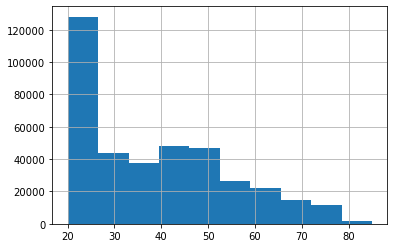

In [6]:
# most drivers are 20-25 age
df['Age'].hist()
plt.show()

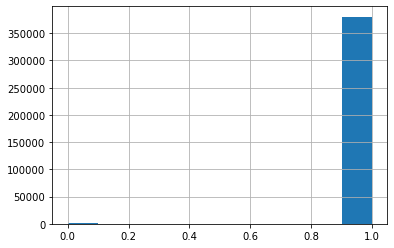

In [7]:
# almost everyone has a license
df['Driving_License'].hist()
plt.show()

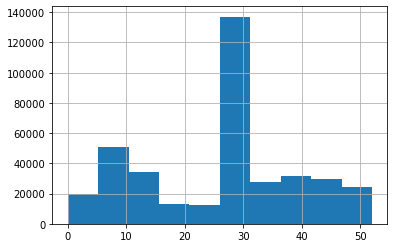

In [8]:
# most live in region of 28?
df['Region_Code'].hist()
plt.show()

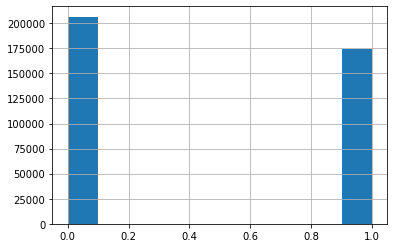

In [9]:
# half the people were and were not previously insured
df['Previously_Insured'].hist()
plt.show()

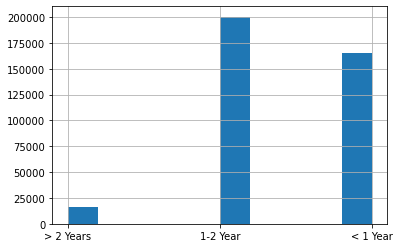

In [10]:
# most vehicles are less than 2 years of age
df['Vehicle_Age'].hist()
plt.show()

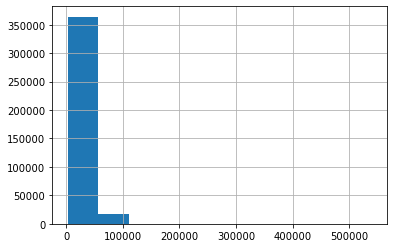

In [11]:
# most people pay the lowest annual premium
df['Annual_Premium'].hist()
plt.show()

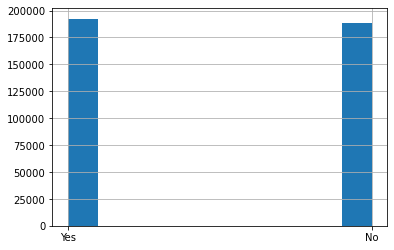

In [12]:
# half the people had vehicle damage and half not
df['Vehicle_Damage'].hist()
plt.show()

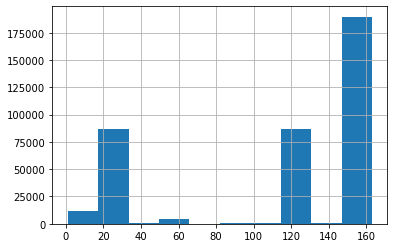

In [13]:
# sales channel 150 seems to bring in the most business
df['Policy_Sales_Channel'].hist()
plt.show()

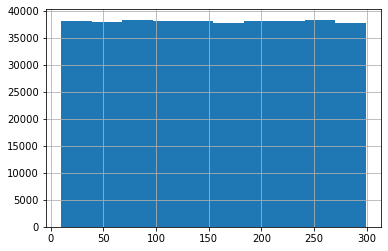

In [14]:
# pretty even distribution
df['Vintage'].hist()
plt.show()

<AxesSubplot:>

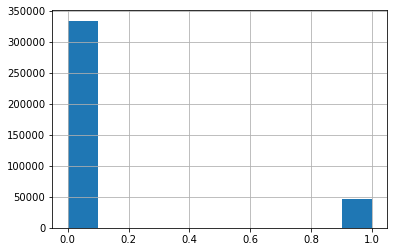

In [15]:
# dataset is not balanced
# small percentage of people are responding yes to cross sell offer which is expected
df['Response'].hist()

<AxesSubplot:>

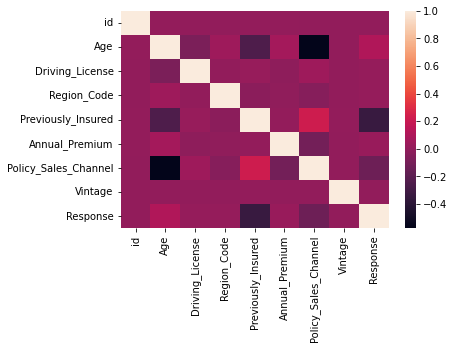

In [16]:
# High correlation
# Policy_Sales_Channel to Previously_Insured
sns.heatmap(df.corr())

In [17]:
# Correlation to Target
# Age has highest relevance
# The annual premium, where the customer lives and whether or not they have a driver's license
# oppositely correlated is if the customer has been previously insured, no correlation
print(df.corr()['Response'].sort_values(ascending=False))

Response                1.000000
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64


In [18]:
# Possible Feature Engineering
# breakup Age into young adult, middle age, senior citizens


In [19]:
# Check outliers

In [20]:
# Bin 'Age' column categories:
# Ages 0 to 3: Toddler
# Ages 4 to 17: Child
# Ages 18 to 25: Young Adult
# Ages 26 to 64: Adult
# Ages 65 to 99: Elder

new_df = df.copy()
new_df['Age'] = pd.cut(new_df['Age'], bins=[0,3,17,25,64,99],
                       labels=['Toddler', 'Child', 'Young Adult', 'Adult', 'Elder'])

print(new_df)

            id  Gender          Age  Driving_License  Region_Code  \
0            1    Male        Adult                1         28.0   
1            2    Male        Elder                1          3.0   
2            3    Male        Adult                1         28.0   
3            4    Male  Young Adult                1         11.0   
4            5  Female        Adult                1         41.0   
...        ...     ...          ...              ...          ...   
381104  381105    Male        Elder                1         26.0   
381105  381106    Male        Adult                1         37.0   
381106  381107    Male  Young Adult                1         30.0   
381107  381108  Female        Elder                1         14.0   
381108  381109    Male        Adult                1         29.0   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0   > 2 Years            Yes         40454.0   
1                        

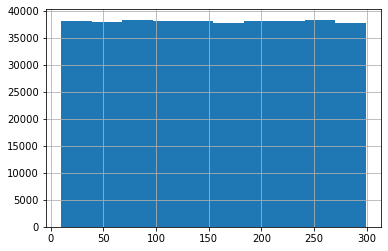

            id  Gender          Age  Driving_License  Region_Code  \
0            1    Male        Adult                1         28.0   
1            2    Male        Elder                1          3.0   
2            3    Male        Adult                1         28.0   
3            4    Male  Young Adult                1         11.0   
4            5  Female        Adult                1         41.0   
...        ...     ...          ...              ...          ...   
381104  381105    Male        Elder                1         26.0   
381105  381106    Male        Adult                1         37.0   
381106  381107    Male  Young Adult                1         30.0   
381107  381108  Female        Elder                1         14.0   
381108  381109    Male        Adult                1         29.0   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0   > 2 Years            Yes         40454.0   
1                        

In [21]:
# Bin 'Vintage' column - so it's the number of days the customer has been with the business
# Ages 0 to 3: Toddler
# Ages 4 to 17: Child
# Ages 18 to 25: Young Adult
# Ages 26 to 64: Adult
# Ages 65 to 99: Elder

# looks like an even distribution
new_df['Vintage'].hist()
plt.show()

df_temp = new_df.copy()
df_temp['Vintage'] = pd.cut(df_temp['Vintage'], bins=[0,91,183,274, 365],
                       labels=['Q1', 'Q2', 'Q3', 'Q4'])

print(df_temp)

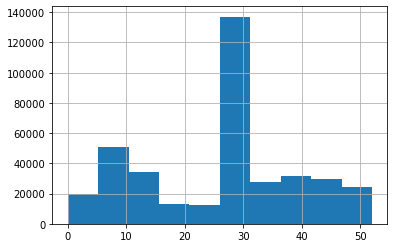

            id  Gender          Age  Driving_License Region_Code  \
0            1    Male        Adult                1     Region2   
1            2    Male        Elder                1     Region1   
2            3    Male        Adult                1     Region2   
3            4    Male  Young Adult                1     Region1   
4            5  Female        Adult                1     Region3   
...        ...     ...          ...              ...         ...   
381104  381105    Male        Elder                1     Region2   
381105  381106    Male        Adult                1     Region3   
381106  381107    Male  Young Adult                1     Region2   
381107  381108  Female        Elder                1     Region1   
381108  381109    Male        Adult                1     Region2   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0   > 2 Years            Yes         40454.0   
1                        0    1-2 Yea

In [22]:
# Bin 'Region_Code' column - so it's the number of days the customer has been with the business
# Ages 0 to 3: Toddler
# Ages 4 to 17: Child
# Ages 18 to 25: Young Adult
# Ages 26 to 64: Adult
# Ages 65 to 99: Elder

# looks like an even distribution
new_df['Region_Code'].hist()
plt.show()

df_temp = df_temp.copy()
df_temp['Region_Code'] = pd.cut(df_temp['Region_Code'], bins=[0,15,30,45],
                       labels=['Region1', 'Region2', 'Region3'])

print(df_temp)

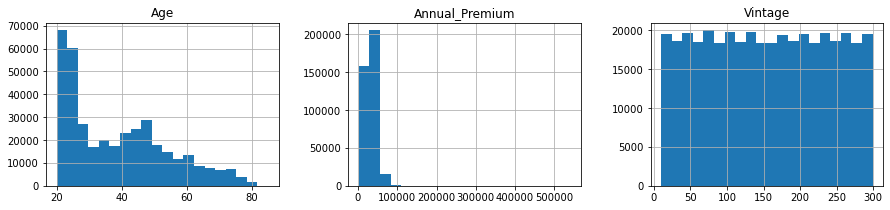

In [23]:
# to view numerical features in charts
num_cols = ['Age', 'Annual_Premium', 'Vintage']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[num_cols].hist(bins=20, figsize=(10, 7), ax=ax)
plt.show()

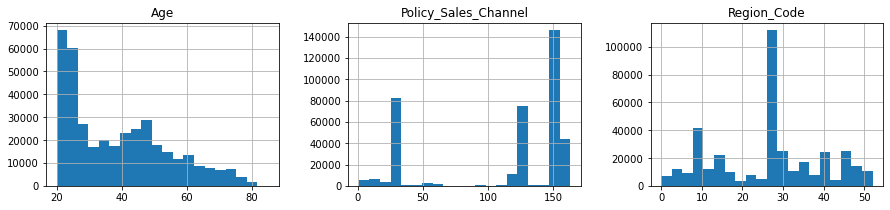

In [24]:
# to view numerical features in charts
num_cols = ['Age', 'Policy_Sales_Channel', 'Region_Code']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[num_cols].hist(bins=20, figsize=(10, 7), ax=ax)
plt.show()

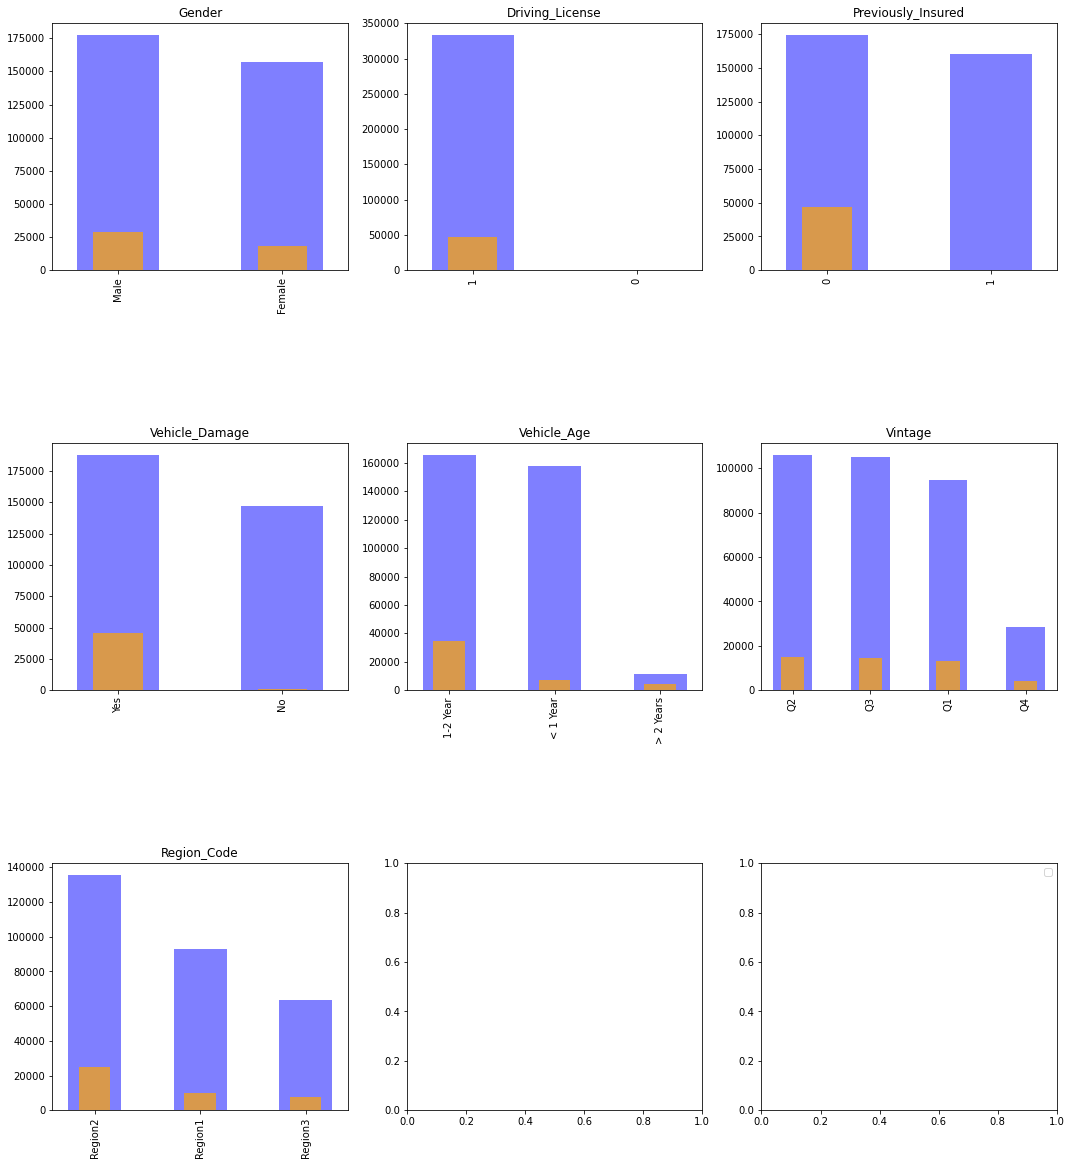

In [41]:
categorical_features = [
 'Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Damage',
 'Vehicle_Age',
 'Vintage',
 'Region_Code']
df = df_temp
ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[df.Response == 0][categorical_feature].value_counts().plot(kind = 'bar', 
                width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature)
    df[df.Response == 1][categorical_feature].value_counts().plot(kind = 'bar', 
                width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature)
    plt.legend(['No', 'Yes'])
    fig.subplots_adjust(hspace=0.7)
    
# https://subscription.packtpub.com/book/data/9781119526810/6/ch06lvl1sec31/42-bar-graphs-with-response-overlay
# how to create normalized graph

<AxesSubplot:xlabel='Region_Code'>

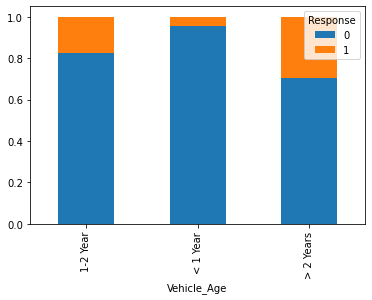

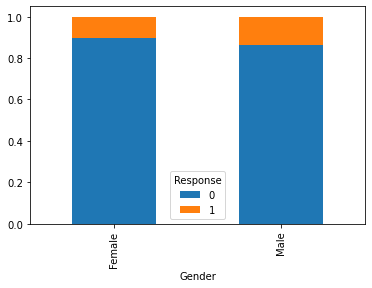

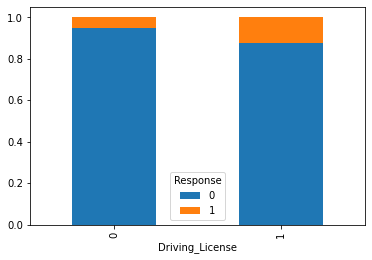

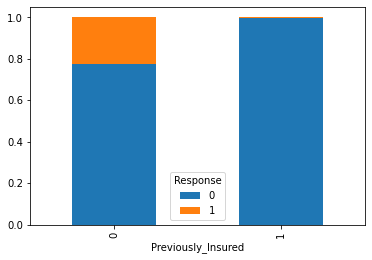

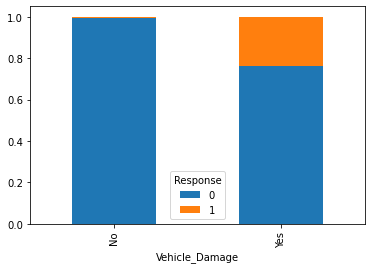

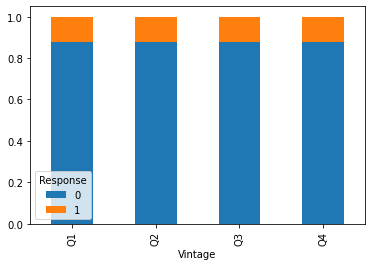

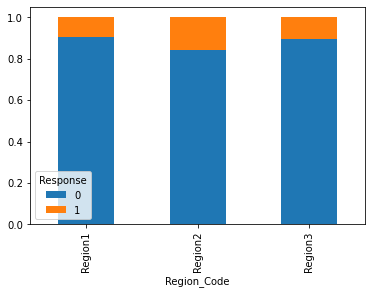

In [46]:
# Normalized bar chart of categorical variables to response

crosstab_01 = pd.crosstab(df['Vehicle_Age'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)


crosstab_01 = pd.crosstab(df['Gender'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)



crosstab_01 = pd.crosstab(df['Driving_License'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)



crosstab_01 = pd.crosstab(df['Previously_Insured'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)



crosstab_01 = pd.crosstab(df['Vehicle_Damage'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)



crosstab_01 = pd.crosstab(df['Vintage'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)


crosstab_01 = pd.crosstab(df['Region_Code'], df['Response'])
#crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

In [26]:
new_df[new_df.Response == 0]['Gender'].value_counts().plot(kind = 'bar', 
                width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title('Age')

Text(0.5, 1.0, 'Age')